In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fec = pd.read_csv("../datasets/fec/P00000001-ALL.csv")

C:\Users\lei_jia.NUANCE\AppData\Local\Continuum\anaconda3\envs\gluon\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [4]:
fec.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [5]:
parties = {'Bachmann, Michelle':'Republican', 
           'Romney, Mitt': 'Republican', 
           'Obama, Barack': 'Democrat',
           "Roemer, Charles E. 'Buddy' III": 'Republican', 
           'Pawlenty, Timothy': 'Republican',
           'Johnson, Gary Earl': 'Republican', 
           'Paul, Ron': 'Republican', 
           'Santorum, Rick': 'Republican',
           'Cain, Herman': 'Republican', 
           'Gingrich, Newt' :'Republican', 
           'McCotter, Thaddeus G':'Republican',
           'Huntsman, Jon':'Republican', 
           'Perry, Rick':'Republican'
}

In [6]:
fec.cand_nm.iloc[123456: 123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [7]:
fec['party'] = fec.cand_nm.map(parties)

In [8]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [9]:
fec = fec[fec.contb_receipt_amt > 0]

In [10]:
fec['party'].value_counts()

Democrat      589127
Republican    402348
Name: party, dtype: int64

In [11]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [12]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}
f = lambda x : occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [13]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED'
}
f = lambda x : emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [14]:
by_occupation = fec.pivot_table(values='contb_receipt_amt', index="contbr_occupation", columns='party', aggfunc='sum')

In [15]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [16]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [17]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


In [18]:
over_2mm.plot(kind='barh')

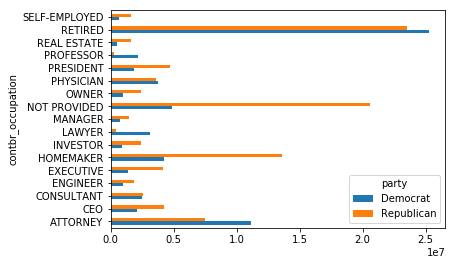

In [19]:
plt.show()

In [35]:
def get_top_amounts(group, key, n=5):
    total = group.groupby(key)['contb_receipt_amt'].sum()
    return total.sort_values(ascending=False)[:n]

In [22]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [23]:
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [36]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [37]:
grouped.apply(get_top_amounts, 'contbr_employer', n=7)

cand_nm        contbr_employer
Obama, Barack  RETIRED            22694358.85
               SELF-EMPLOYED      18626807.16
               NOT EMPLOYED        8586308.70
               NOT PROVIDED        5053480.37
               HOMEMAKER           2605408.54
               STUDENT              318831.45
               VOLUNTEER            257104.00
Romney, Mitt   NOT PROVIDED       12059527.24
               RETIRED            11506225.71
               HOMEMAKER           8147196.22
               SELF-EMPLOYED       7414115.22
               STUDENT              496490.94
               CREDIT SUISSE        281150.00
               MORGAN STANLEY       267266.00
Name: contb_receipt_amt, dtype: float64

In [39]:
bins = np.array([0, 1, 10, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [40]:
labels

411          (10, 1000]
412          (10, 1000]
413          (10, 1000]
414          (10, 1000]
415          (10, 1000]
416          (10, 1000]
417          (10, 1000]
418          (10, 1000]
419          (10, 1000]
420          (10, 1000]
421          (10, 1000]
422          (10, 1000]
423          (10, 1000]
424          (10, 1000]
425          (10, 1000]
426          (10, 1000]
427       (1000, 10000]
428          (10, 1000]
429          (10, 1000]
430          (10, 1000]
431       (1000, 10000]
432          (10, 1000]
433          (10, 1000]
434          (10, 1000]
435          (10, 1000]
436          (10, 1000]
437          (10, 1000]
438          (10, 1000]
439          (10, 1000]
440          (10, 1000]
              ...      
701356       (10, 1000]
701357          (1, 10]
701358       (10, 1000]
701359       (10, 1000]
701360       (10, 1000]
701361       (10, 1000]
701362       (10, 1000]
701363       (10, 1000]
701364       (10, 1000]
701365       (10, 1000]
701366       (10

In [43]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 1000]",526271.0,75210.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [46]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [47]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 1000]",75087512.87,24351165.45
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [48]:
normed_sum = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [49]:
normed_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 1000]",0.755114,0.244886
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


In [60]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [80]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
AP,37130.50,1655.00
AR,359247.28,105556.00
AS,2955.00,0.00
AZ,1506476.98,1888436.23


In [81]:
totals = totals[totals.sum(1) > 100000]

In [82]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [83]:
precent = totals.div(totals.sum(1), axis=0)

In [84]:
precent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
